# Vehicle Price Prediction

## Loading the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

In [2]:
file_path = "C:\\Users\\Anagha\\ADA\\Projects\\Used Vehicles\\Vehicle.xlsx"

In [3]:
data = pd.read_excel(file_path)

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


## Converting the categorical variables into continuous variables

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
number = LabelEncoder()

In [8]:
#Fuel_Type: 0 = CNG, 1 = Diesel, 2 =Petrol
#Transmission: 0 = Automatic, 1 = Manual
#Seller_Type: 0 = Dealer, 1 = Individual

data['Fuel_Type'] = number.fit_transform(data['Fuel_Type'].astype('str'))
data['Transmission'] = number.fit_transform(data['Transmission'].astype('str'))
data['Seller_Type'] = number.fit_transform(data['Seller_Type'].astype('str'))
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


## EDA

In [9]:
# sns.pairplot(data,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
# plt.show()

As we can see from the above plot, selling price, year and kms driven has a major impact than other features

In [10]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


### Some conclusions -
1. Less Kms driven cars have a higher selling price
2. Diesel cars have a higher selling price
3. Newer cars have a higher selling price
4. Present Price has a good effect too

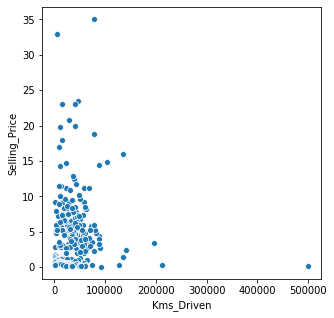

In [11]:
#y=5.9559+x1*452700
#FacetGrid
#Cufflinks

fig,ax1 = plt.subplots(figsize=(5,5))
sns.scatterplot(x='Kms_Driven',y='Selling_Price',data=data,ax=ax1)

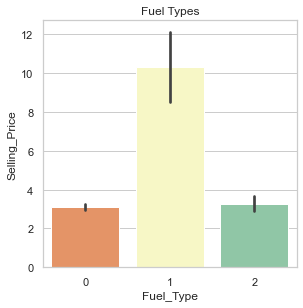

In [12]:
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")
plt.figure(2, figsize=(10,10))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Fuel Types')
sns.barplot(x='Fuel_Type',y='Selling_Price', data=data, palette='Spectral')

In [13]:
data['Year_Diff'] = 2018 - data['Year']
data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null int32
Seller_Type      301 non-null int32
Transmission     301 non-null int32
Owner            301 non-null int64
Year_Diff        301 non-null int64
dtypes: float64(2), int32(3), int64(4), object(1)
memory usage: 20.1+ KB


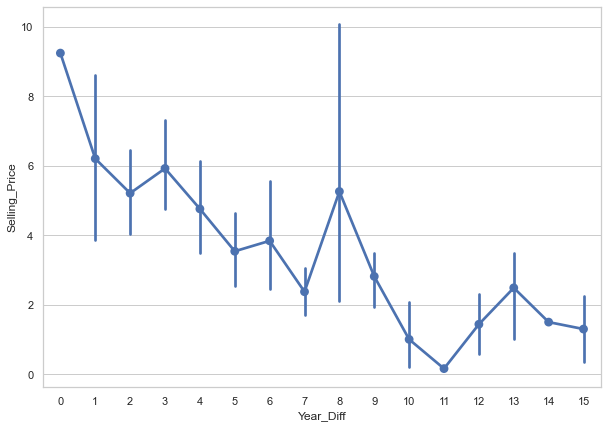

In [14]:
#Using a pair plot 

plt.figure(2, figsize=(10,7))
sns.pointplot(data['Year_Diff'],data['Selling_Price'])

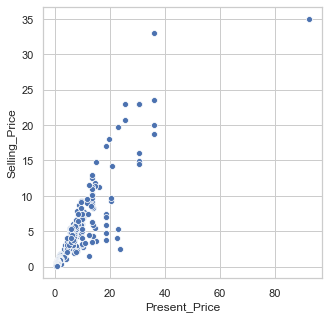

In [15]:
fig,ax1 = plt.subplots(figsize=(5,5))
sns.scatterplot(x='Present_Price',y='Selling_Price',data=data,ax=ax1)

## Splitting the dataset into test and train

In [16]:
from sklearn.model_selection import train_test_split

x = data[['Kms_Driven','Present_Price','Year','Fuel_Type']]
y = data[['Selling_Price']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (210, 4)
x test:  (91, 4)
y train:  (210, 1)
y test:  (91, 1)


### Making a function to do basic analysis

In [17]:
def plot_prices(y, y_pred, data_string):
    plt.figure(figsize=(18, 8))
    plt.plot(range(0, len(y)), y, label="TrueValues", marker="*", linewidth=3)
    plt.plot(range(0, len(y)), y_pred, label="PredictedValues", marker="o", linewidth=3)
    plt.xlabel("Indices", fontsize=20)
    plt.ylabel("Selling Price of Cars", fontsize=20)
    plt.title("True Vs. Predicted S.P. - " + data_string, fontsize=20)
    plt.legend()

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r_2 = []
ma_e = []
ms_e = []

def apply_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    # Train data 
    mse = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mae = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    r2 = model.score(X_train, y_train)
    
    r_2.append(r2)
    ms_e.append(mse)
    ma_e.append(mae)
    
    print("MSE on train data: ", mse)
    print("MAE on train data: ", mae)
    print("R squared on train data: ", r2)  
    
    print()
    print("-"*50)
    print()
    
    # Test data 
    mse = mean_squared_error(y_true=y_test, y_pred=linreg.predict(X_test))
    mae = mean_absolute_error(y_true=y_test, y_pred=linreg.predict(X_test))
    r2 = linreg.score(X_test, y_test)

    print("MSE on test data: ", mse)
    print("MAE on test data: ", mae)
    print("R squared on test data: ", r2)
    
    print()
    print("-"*50)
    print()
    print(r_2)
    plot_prices(y_train, model.predict(X_train), "TRAINING SET")
    
    plot_prices(y_test, model.predict(X_test), "TEST SET")

## Using a simple Linear Regression model

MSE on train data:  3.827585999290453
MAE on train data:  1.3044973642307576
R squared on train data:  0.8652756868199827

--------------------------------------------------

MSE on test data:  2.8229013004369246
MAE on test data:  1.2033207358997027
R squared on test data:  0.8555992340874018

--------------------------------------------------

[0.8652756868199827]


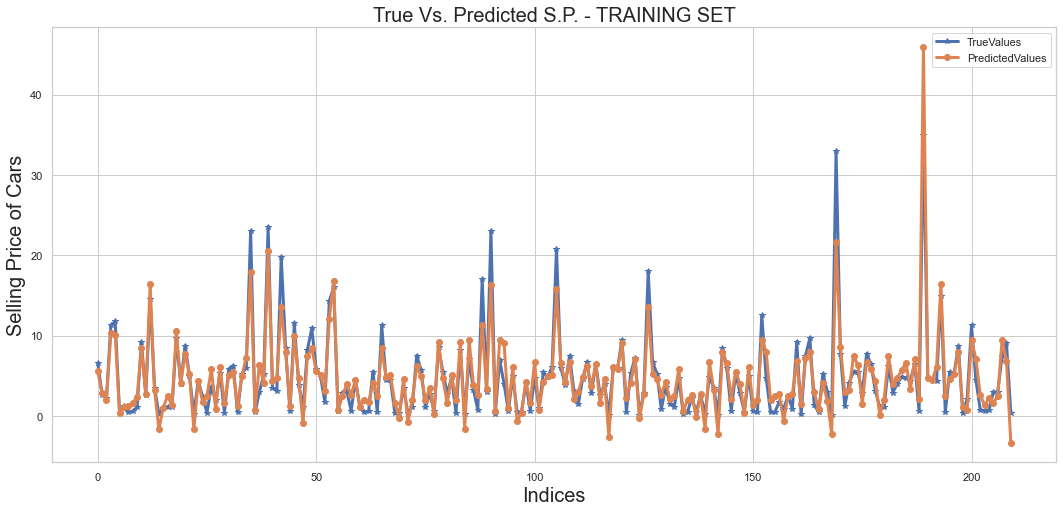

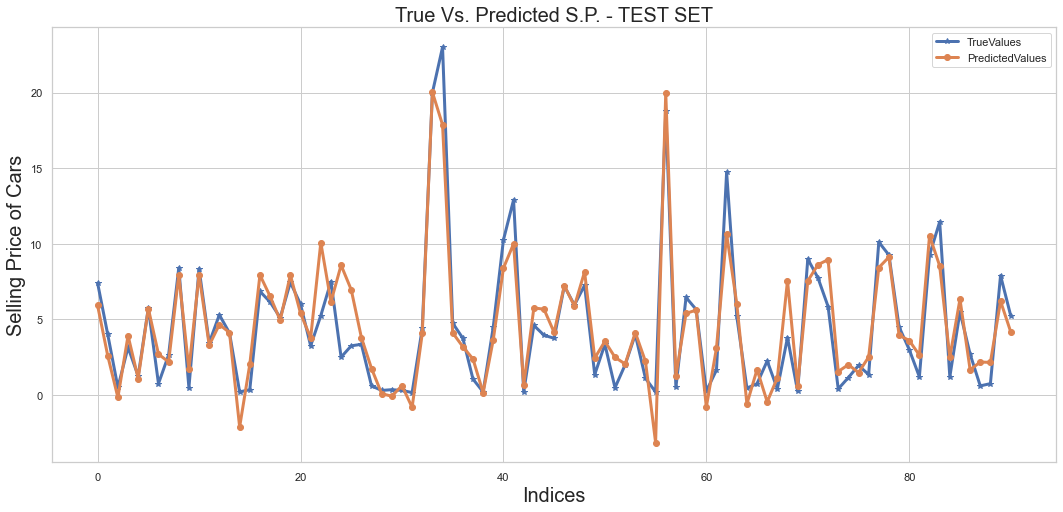

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
apply_model(linreg,x_train,y_train,x_test,y_test)


Clearly, the model doesn't work well with unseen values

### What is grid search?

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.


## Ridge Regression Model

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

C:\Users\Anagha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.812043747332294
0.07017038286703829


The alpha value estimated is 0.07. But this seems to be a little high

MSE on train data:  3.930315929438824
MAE on train data:  1.3349462728158663
R squared on train data:  0.8616597734780393

--------------------------------------------------

MSE on test data:  2.8229013004369246
MAE on test data:  1.2033207358997027
R squared on test data:  0.8555992340874018

--------------------------------------------------

[0.8652756868199827, 0.8616597734780393]


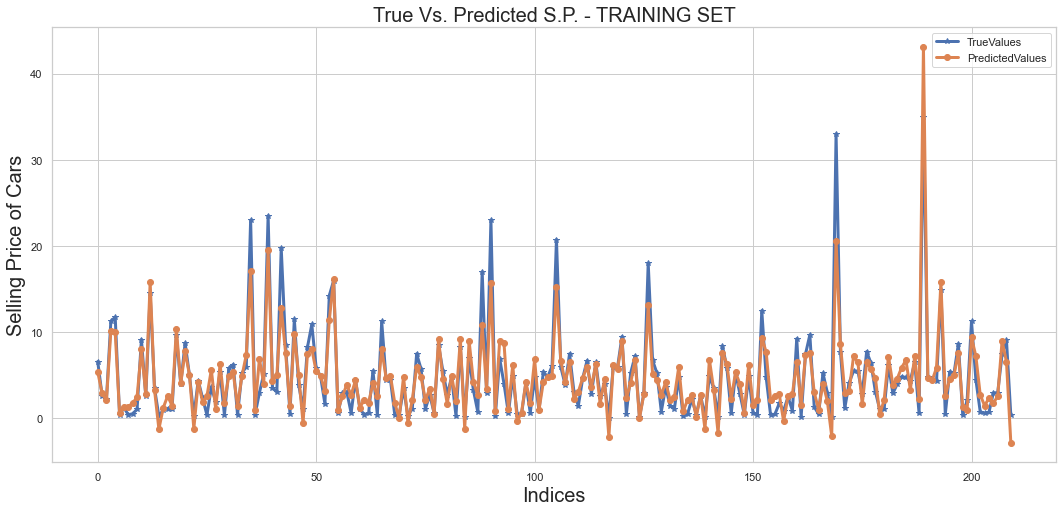

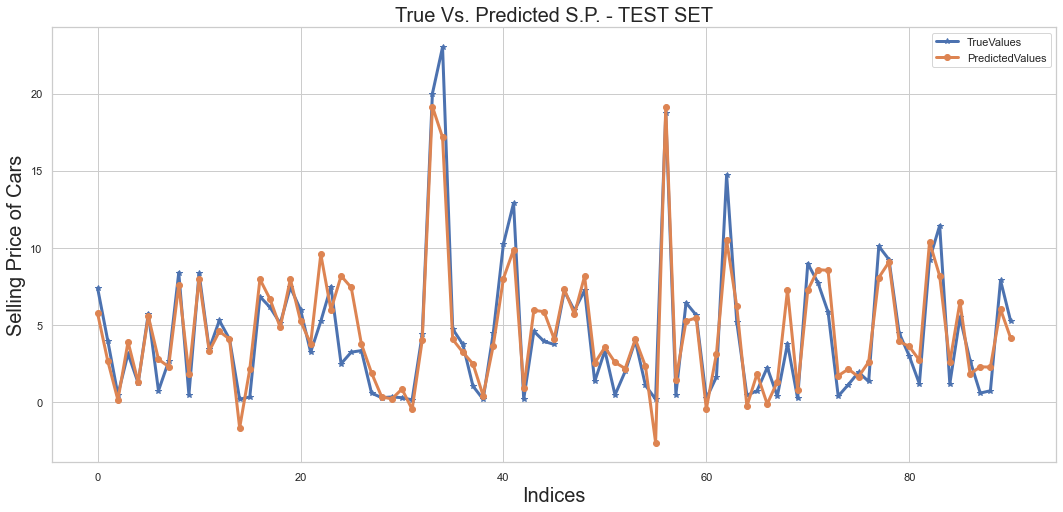

In [21]:
ridge = Ridge(alpha = grid2.best_estimator_.alpha, normalize = True) 
apply_model(ridge,x_train,y_train,x_test,y_test)

## Lasso Regression Model

In [22]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Lasso

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

C:\Users\Anagha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8120057181811362
0.001


As we can see, the best fit for alpha is 0.001. Hence we will use that

MSE on train data:  3.8282308547182056
MAE on train data:  1.3025880258814433
R squared on train data:  0.8652529890400714

--------------------------------------------------

MSE on test data:  2.8229013004369246
MAE on test data:  1.2033207358997027
R squared on test data:  0.8555992340874018

--------------------------------------------------

[0.8652756868199827, 0.8616597734780393, 0.8652529890400714]


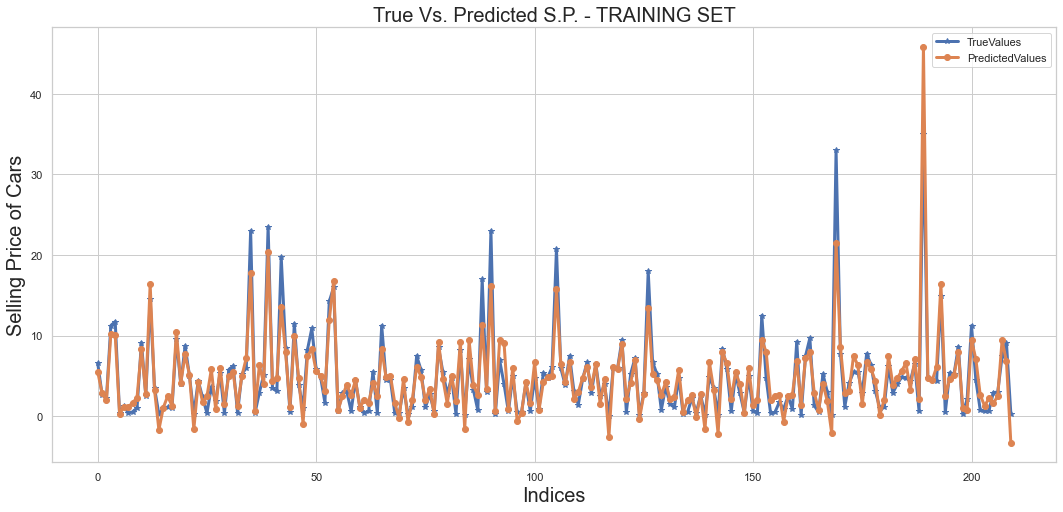

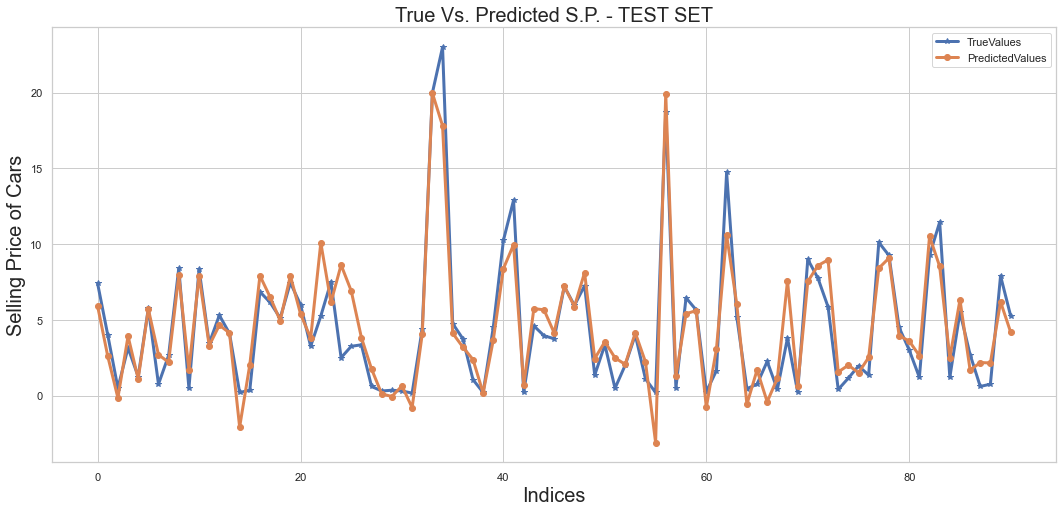

In [23]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True)
apply_model(ls,x_train,y_train,x_test,y_test)

In [26]:
Model = ["Linear Regression","Ridge","Lasso"]
results=pd.DataFrame({'Model': Model,'MSE': ms_e,'MAE': ma_e, 'R': r_2})
results

,Model,MSE,MAE,R
0,Linear Regression,3.827586,1.304497,0.865276
1,Ridge,3.930316,1.334946,0.861660
2,Lasso,3.828231,1.302588,0.865253


#### Hence, we can conclude that using a Lasso regression model would give a more accurate prediction than the other two regression models.